<h1>Image Recognition</h1>

kears preprocessing.image and image data generator generates batches of tensor data with real-time data augmentation

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


<h1>Establishing data</h1>
I downloaded kaggles full Natural images dataset sense the one in the tuturial is a watered down version of it im establishing the file paths that contain the images the train path will be in one path and the test path will be unnamed images that the model will have to predict.

batch_size of 16 is telling us that our batch will be 16 pics at a time
image_size will be used to reduce the size of images
num_class is ___

In [2]:
train_path = 'train/natural_images/'
test_path = 'test/'
batch_size = 16
image_size = 224
num_class = 8


<h1>Data generation</h1>

validation_split is a number between 1 and 0 that will decied what portion of the training data will not be used to train and will evaluate the loss and any model metrics on this data at the end of each epoch

<b>shear_range</b> is used to randomly apply shearing transformations 

<b>zoom_range</b> is used to setup a randomly generatated zoom on the data

<b>horizontal_flip</b> is used to flip the data horizontal randomly

In [3]:
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

<h1>Setting Up The Train</h1>

<b>flow_from_directory</b> tells is used when the data is in a directory instead of a database

<b>directory</b> is the directory of the data in this case the pictures

<b>target_size</b> sets up the size of the the images in this case they will be a 224x224

<b>batch_size</b> will be how many are in a batch at one time in this case its 16

<b>class_mode</b> is to establish how many classes there will be if only 2 classes use "binary" if more than 2 use "categorical" and if ists an autoencoder system where the input and output would probaly be the same set to "input"

<b>color_mode</b> tells the train what the pictures color is if black and white or greyscale use "greyscale", if the images are colorful use "rgb"

<b>shuffle</b> set "True" if you want the shuffle the order of the images else set "False"

<b>seed</b> I didn't use seed but what it does is set a random order for the image augmentaion and shuffling

In [4]:
train_generator = train_datagen.flow_from_directory(
                        directory=train_path,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        shuffle=True)

Found 6899 images belonging to 8 classes.


<h1>Note</h1>
I had to install a libary called pillows for it to be able to read the pictures even though it found them just a second ago

In [5]:
x_batch, y_batch = train_generator.next()



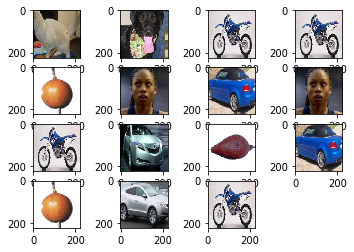

In [6]:
fig=plt.figure()
columns = 4
rows = 4
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.int)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

<h1>Now It Is Time For The Model</h1>

keras comes with some pretrained models I will be using VGG16
it works really good for images

In [7]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

<h1>Downloading the Vgg model</h1>

In [8]:
base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(image_size, image_size, 3))

In [9]:
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<b>Freeze the Layers so we don't waste compute time</b>

In [10]:
for layer in base_model.layers:
    layer.trainable = False

<b>creating the model</b>

In [11]:
model = keras.models.Sequential()

<b>add the vgg base model</b>

In [12]:
model.add(base_model)

<b>add new layers</b>

<b>Flatten</b> will take the picture and flatten it does not change batch size

<b>Dense</b> just a normal layer of neurons in a nn each one recieves input from the previous thus densely connected

In [13]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_class, activation='softmax'))

In [14]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 8200      
Total params: 41,463,624
Trainable params: 26,748,936
Non-trainable params: 14,714,688
_________________________________________________________________
None


<h1>Train</h1>

<b>compile the model
    
SGD</b> is stochastic gradient descent optimizer wich means it makes the data more smoth on the graph

In [15]:
from keras.optimizers import SGD

<b>loss</b> is a string (name of function) that is used to get the score of how the model did
<b>metrics</b> is used to emphisise that in this case we want accuracy


In [16]:
model.compile(loss='categorical_crossentropy',
          optimizer=SGD(lr=1e-3),
          metrics=['accuracy'])

<b>start the training</b>
 this will start training the model and show a graph after showing its results
 
<h1></h1>
using a cpu which is a ryzen 2700x would have taken 18min on just the first epoch acording to the eta I installed tf gpu and tf will use a gpu if avialble automaticly and now the eta was signigicintly less with a 1070ti.

<h1></h1>
You can only use a nivida gpu for most frameworks and I imagine the time would be even better if I had a gpu with more cuda cores

Epoch 1/10
432/431 [==============================] - 164s 380ms/step - loss: 0.4595 - accuracy: 0.9609
Epoch 2/10
432/431 [==============================] - 160s 371ms/step - loss: 0.1129 - accuracy: 0.9857
Epoch 3/10
432/431 [==============================] - 159s 367ms/step - loss: 0.0419 - accuracy: 0.9939
Epoch 4/10
432/431 [==============================] - 160s 371ms/step - loss: 0.0336 - accuracy: 0.9942
Epoch 5/10
432/431 [==============================] - 159s 368ms/step - loss: 0.0328 - accuracy: 0.9946
Epoch 6/10
432/431 [==============================] - 159s 369ms/step - loss: 0.0263 - accuracy: 0.9962
Epoch 7/10
432/431 [==============================] - 157s 364ms/step - loss: 0.0250 - accuracy: 0.9957
Epoch 8/10
432/431 [==============================] - 159s 367ms/step - loss: 0.0105 - accuracy: 0.9981
Epoch 9/10
432/431 [==============================] - 157s 364ms/step - loss: 0.0106 - accuracy: 0.9978
Epoch 10/10
432/431 [==============================] - 157s 364m

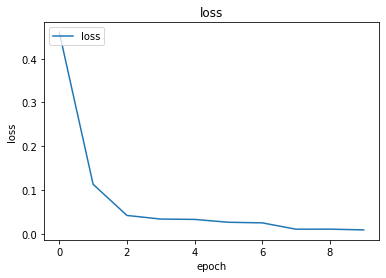

In [17]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n/batch_size,
        epochs=10)

model.save('fine_tune.h5')

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

<b>Now it is time to test the model</b>

In [43]:
model = load_model('fine_tune.h5')

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
                        directory=train_path,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        shuffle=True)

test_generator = test_datagen.flow_from_directory(
                        directory=test_path, 
                        target_size=(image_size, image_size),
                        color_mode='rgb',
                        shuffle=True,
                        class_mode='categorical',
                        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)



Found 6899 images belonging to 8 classes.
Found 6899 images belonging to 8 classes.


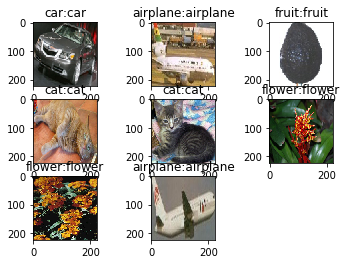

In [45]:
fig=plt.figure()
columns = 3
rows = 3
for i in range(1, columns*rows):
    x_batch, y_batch = test_generator.next()

    name = model.predict(x_batch)
    name = np.argmax(name, axis=-1)
    true_name = y_batch
    true_name = np.argmax(true_name, axis=-1)

    label_map = (test_generator.class_indices)
    label_map = dict((k,v) for v,k in label_map.items()) #flip k,v
    predictions = [label_map[v] for v in name]
    true_value = [label_map[k] for k in true_name]

    image = x_batch[0].astype(np.int)
    fig.add_subplot(rows, columns, i)
    plt.title(str(predictions[0]) + ':' + str(true_value[0]))
    plt.imshow(image)
plt.show()